In [54]:
#import libraries

import pandas as pd 
import numpy as np 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

In [55]:
#Load the dataset

df=pd.read_csv(r"C:\Users\dell\Desktop\Rohith\student.csv")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [57]:
#data cleaning

print(df.isna().sum())

Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64


In [58]:
print(df.dropna())

      Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
0                 0.95822          3.4          8.2            53.0    47.0
1                 0.85566          3.2          5.9            55.0    35.0
2                 0.68025          3.2          9.3            41.0    32.0
3                 0.25936          3.2          8.2            47.0    34.0
4                 0.60447          3.8         10.0            75.0    33.0
...                   ...          ...          ...             ...     ...
1383              0.44549          5.5          8.0            51.0    41.0
1384              0.52466          4.9          6.5            63.0    37.0
1385              0.88197          3.9          6.2            54.0    36.0
1386              0.47336          3.5          7.3            61.0    34.0
1387              0.58119          3.7          9.7            79.0    35.0

[1388 rows x 5 columns]


In [59]:
print(df.dropna())

      Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
0                 0.95822          3.4          8.2            53.0    47.0
1                 0.85566          3.2          5.9            55.0    35.0
2                 0.68025          3.2          9.3            41.0    32.0
3                 0.25936          3.2          8.2            47.0    34.0
4                 0.60447          3.8         10.0            75.0    33.0
...                   ...          ...          ...             ...     ...
1383              0.44549          5.5          8.0            51.0    41.0
1384              0.52466          4.9          6.5            63.0    37.0
1385              0.88197          3.9          6.2            54.0    36.0
1386              0.47336          3.5          7.3            61.0    34.0
1387              0.58119          3.7          9.7            79.0    35.0

[1388 rows x 5 columns]


In [60]:
df.drop_duplicates(inplace=True)

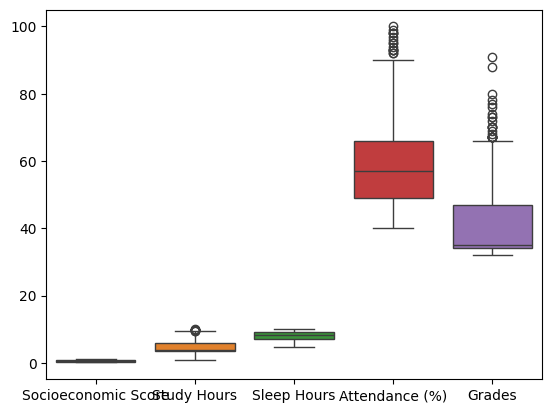

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df)
plt.show()

In [62]:
df["z_score"]=(df["Study Hours"]-df["Study Hours"].mean())/df["Study Hours"].std()
df["z_score"]=(df["Sleep Hours"]-df["Sleep Hours"].mean())/df["Sleep Hours"].std()
df["z_score"]=(df["Attendance (%)"]-df["Attendance (%)"].mean())/df["Attendance (%)"].std()
df["z_score"]=(df["Grades"]-df["Grades"].mean())/df["Grades"].std()

threshold=1
df_no_outliers=df[df["z_score"].abs()<=threshold]
df=df_no_outliers.drop(columns=["z_score"])
print(df)

      Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
0                 0.95822          3.4          8.2            53.0    47.0
1                 0.85566          3.2          5.9            55.0    35.0
2                 0.68025          3.2          9.3            41.0    32.0
3                 0.25936          3.2          8.2            47.0    34.0
4                 0.60447          3.8         10.0            75.0    33.0
...                   ...          ...          ...             ...     ...
1383              0.44549          5.5          8.0            51.0    41.0
1384              0.52466          4.9          6.5            63.0    37.0
1385              0.88197          3.9          6.2            54.0    36.0
1386              0.47336          3.5          7.3            61.0    34.0
1387              0.58119          3.7          9.7            79.0    35.0

[1147 rows x 5 columns]


                     Socioeconomic Score  Study Hours  Sleep Hours  \
Socioeconomic Score             1.000000    -0.122068    -0.016077   
Study Hours                    -0.122068     1.000000    -0.044144   
Sleep Hours                    -0.016077    -0.044144     1.000000   
Attendance (%)                 -0.042336     0.408927    -0.014336   
Grades                          0.258801     0.678609     0.015515   

                     Attendance (%)    Grades  
Socioeconomic Score       -0.042336  0.258801  
Study Hours                0.408927  0.678609  
Sleep Hours               -0.014336  0.015515  
Attendance (%)             1.000000  0.166675  
Grades                     0.166675  1.000000  


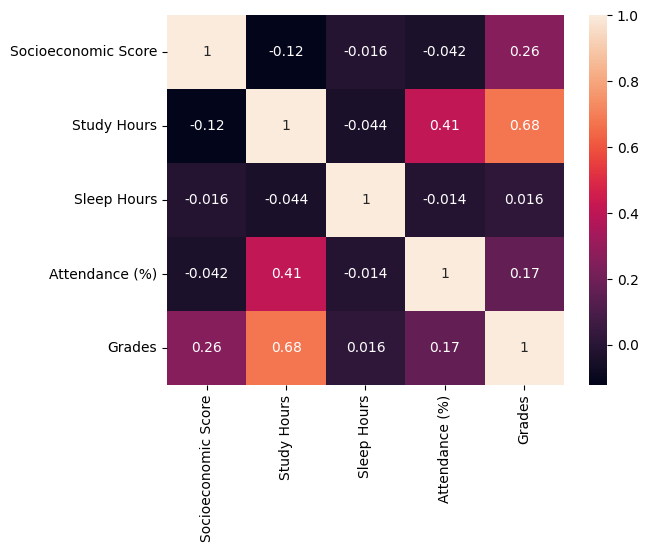

In [63]:
correlation=df.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)
plt.show()

In [64]:
print(df.describe)

<bound method NDFrame.describe of       Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
0                 0.95822          3.4          8.2            53.0    47.0
1                 0.85566          3.2          5.9            55.0    35.0
2                 0.68025          3.2          9.3            41.0    32.0
3                 0.25936          3.2          8.2            47.0    34.0
4                 0.60447          3.8         10.0            75.0    33.0
...                   ...          ...          ...             ...     ...
1383              0.44549          5.5          8.0            51.0    41.0
1384              0.52466          4.9          6.5            63.0    37.0
1385              0.88197          3.9          6.2            54.0    36.0
1386              0.47336          3.5          7.3            61.0    34.0
1387              0.58119          3.7          9.7            79.0    35.0

[1147 rows x 5 columns]>


In [66]:
print(df.describe)

<bound method NDFrame.describe of       Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
0                 0.95822          3.4          8.2            53.0    47.0
1                 0.85566          3.2          5.9            55.0    35.0
2                 0.68025          3.2          9.3            41.0    32.0
3                 0.25936          3.2          8.2            47.0    34.0
4                 0.60447          3.8         10.0            75.0    33.0
...                   ...          ...          ...             ...     ...
1383              0.44549          5.5          8.0            51.0    41.0
1384              0.52466          4.9          6.5            63.0    37.0
1385              0.88197          3.9          6.2            54.0    36.0
1386              0.47336          3.5          7.3            61.0    34.0
1387              0.58119          3.7          9.7            79.0    35.0

[1147 rows x 5 columns]>


In [67]:
print(df.std(numeric_only=True))

Socioeconomic Score     0.249744
Study Hours             1.376324
Sleep Hours             1.354369
Attendance (%)         10.378104
Grades                  5.038961
dtype: float64


In [68]:
#rename the column

df.rename(columns={"Socioeconomic Score":"Socioeconomic_Score","Study Hours":"Study_Hours","Sleep Hours":"Sleep_Hours","Attendance (%)":"Attendance"},inplace=True)
print(df)
          

      Socioeconomic_Score  Study_Hours  Sleep_Hours  Attendance  Grades
0                 0.95822          3.4          8.2        53.0    47.0
1                 0.85566          3.2          5.9        55.0    35.0
2                 0.68025          3.2          9.3        41.0    32.0
3                 0.25936          3.2          8.2        47.0    34.0
4                 0.60447          3.8         10.0        75.0    33.0
...                   ...          ...          ...         ...     ...
1383              0.44549          5.5          8.0        51.0    41.0
1384              0.52466          4.9          6.5        63.0    37.0
1385              0.88197          3.9          6.2        54.0    36.0
1386              0.47336          3.5          7.3        61.0    34.0
1387              0.58119          3.7          9.7        79.0    35.0

[1147 rows x 5 columns]


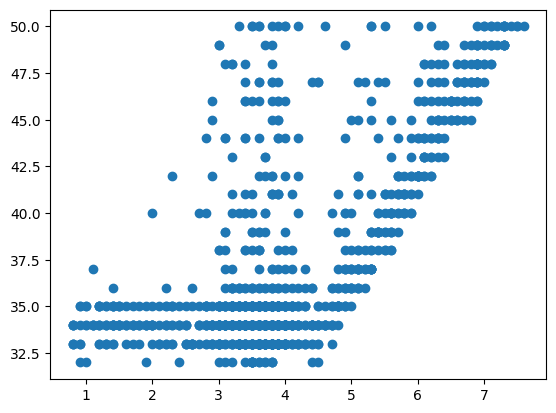

Index(['Socioeconomic_Score', 'Study_Hours', 'Sleep_Hours', 'Attendance',
       'Grades'],
      dtype='object')


In [69]:
#Extracting independent and dependent variable

x=df.iloc[:,:3].values
x=pd.DataFrame(x)
y=df["Grades"]
plt.scatter(df["Study_Hours"],df["Grades"])
plt.show()
print(df.columns)

In [70]:
x=df[["Socioeconomic_Score","Study_Hours"]]
y=df["Grades"]

In [71]:
#split the data into training and testing sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [72]:
x_train

,Socioeconomic_Score,Study_Hours
1098,0.34456,3.8
1219,0.70645,3.9
1275,0.64633,4.3
219,0.88537,3.2
249,0.33990,3.4
...,...,...
1250,0.78419,3.8
915,0.18488,7.5
1008,0.17801,6.1
661,0.16974,4.2


In [73]:
y_train

1098    34.0
1219    33.0
1275    34.0
219     36.0
249     34.0
        ... 
1250    34.0
915     50.0
1008    44.0
661     35.0
818     34.0
Name: Grades, Length: 917, dtype: float64

In [74]:
x_test

,Socioeconomic_Score,Study_Hours
326,0.24780,4.0
840,0.13622,7.0
855,0.37400,3.1
894,0.66550,4.9
1331,0.55288,6.8
...,...,...
1062,0.86570,1.4
567,0.62507,3.7
763,0.73467,3.5
157,0.39414,3.6


In [75]:
y_test

326     35.0
840     47.0
855     33.0
894     37.0
1331    47.0
        ... 
1062    35.0
567     34.0
763     35.0
157     33.0
659     36.0
Name: Grades, Length: 230, dtype: float64

In [77]:
#Building the model

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [83]:

from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(x_train)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

LinearRegression()

In [84]:
#model prediction

y_pred=model.predict(x_test)
print(y_pred)

[35.1750865  42.39948649 33.68126628 40.61943333 44.89017049 36.30039482
 39.81313117 33.20197416 25.89963762 41.23190596 42.12269568 38.05300777
 42.13927108 35.92666754 36.44133249 34.12530321 38.9605754  41.8840808
 34.87248145 33.00532594 36.41474869 33.44764849 37.79421484 41.05266152
 35.36082452 38.73625506 32.9126168  39.42028652 36.22001874 36.1022365
 38.29917672 30.63464779 40.75068136 40.1956907  36.70929104 42.23264813
 42.55958514 39.00181691 33.49695172 34.46859674 40.32778132 37.41750959
 37.39339552 31.89018727 36.82509777 39.20954823 36.87013043 44.77817009
 43.48765036 35.5148798  35.01151625 41.68340913 37.05223679 40.99388675
 31.65277774 35.00354119 28.18327283 35.6962016  36.63392666 38.67225011
 35.2217463  33.91120898 37.61765783 33.65890982 45.0859027  40.46675769
 37.52647418 44.11332824 40.04917487 39.5721186  32.35653625 36.09790732
 33.99096038 34.62791123 35.73289603 34.66264397 32.03260603 37.23814909
 37.90187184 39.84774766 36.33344298 42.70861432 33.4

In [85]:
#predict the test set result

accuracy1=r2_score(y_pred,y_test)
print(accuracy1)
model2=XGBRegressor()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
accuracy2=r2_score(y_test,y_pred)
print(accuracy2)

0.334819387711908
0.9238898470104027


In [86]:
accuracy=r2_score(y_test,y_pred)*100
print(accuracy)

92.38898470104027
